In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_excel("Sample Submission.xlsx")

In [3]:
store = pd.read_csv("store.csv")
store.head(100)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,96,a,a,8780.0,2.0,2005.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
96,97,d,c,8980.0,NaN,NaN,0,NaN,NaN,NaN
97,98,d,c,15140.0,12.0,2006.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
98,99,c,c,2030.0,11.0,2003.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [4]:
dummies = pd.get_dummies(store[["PromoInterval"]])

In [5]:
store_df = pd.concat([store, dummies[['PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Feb,May,Aug,Nov',
                                      'PromoInterval_Mar,Jun,Sept,Dec']]], axis = 1)

In [6]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec"
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1,0,0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1,0,0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,0,0,0
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,0,0,0


In [7]:
store_df.drop(["PromoInterval"], axis = 1, inplace = True)

In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec"
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,0,0,0
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,0,0,0
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,0,0,0
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,0,0,0


In [9]:
store_df["Competition"] = np.where(store_df["CompetitionOpenSinceMonth"].isna(), 0, 1)

In [10]:
store_df.insert(3, "CompetitionON", store_df["Competition"])

In [11]:
store_df.drop("Competition", axis = 1, inplace = True)

In [12]:
store_df.rename(columns={"CompetitionON": "Competition"})

,Store,StoreType,Assortment,Competition,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec"
0,1,c,a,1,1270.0,9.0,2008.0,0,NaN,NaN,0,0,0
1,2,a,a,1,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0
2,3,a,a,1,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0
3,4,c,c,1,620.0,9.0,2009.0,0,NaN,NaN,0,0,0
4,5,a,a,1,29910.0,4.0,2015.0,0,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0
1111,1112,c,c,1,1880.0,4.0,2006.0,0,NaN,NaN,0,0,0
1112,1113,a,c,0,9260.0,NaN,NaN,0,NaN,NaN,0,0,0
1113,1114,a,c,0,870.0,NaN,NaN,0,NaN,NaN,0,0,0


In [13]:
store_df

,Store,StoreType,Assortment,CompetitionON,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec"
0,1,c,a,1,1270.0,9.0,2008.0,0,NaN,NaN,0,0,0
1,2,a,a,1,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0
2,3,a,a,1,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0
3,4,c,c,1,620.0,9.0,2009.0,0,NaN,NaN,0,0,0
4,5,a,a,1,29910.0,4.0,2015.0,0,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0
1111,1112,c,c,1,1880.0,4.0,2006.0,0,NaN,NaN,0,0,0
1112,1113,a,c,0,9260.0,NaN,NaN,0,NaN,NaN,0,0,0
1113,1114,a,c,0,870.0,NaN,NaN,0,NaN,NaN,0,0,0


In [14]:
dummies = pd.get_dummies(store[["StoreType", "Assortment"]])
dummies

,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1110,1,0,0,0,1,0,0
1111,0,0,1,0,0,0,1
1112,1,0,0,0,0,0,1
1113,1,0,0,0,0,0,1


In [15]:
store_df2 = pd.concat([store_df, dummies[['StoreType_a', 'StoreType_b',
                                      'StoreType_c', 'Assortment_a', 'Assortment_b']]], axis = 1)

In [16]:
store_df = store_df2.copy()

In [17]:
store_df = store_df.rename(columns={"CompetitionON": "Competition"})

In [18]:
store_df.drop(["Assortment", "StoreType"], axis = 1, inplace = True)

In [19]:
deneme = store_df[0:55]

In [20]:
store_df = deneme.copy()

In [21]:
train = pd.read_excel("Train Set.xlsx")
train = train.drop("Customers", axis = 1)
train.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,1,1,0,1
1,2,5,2015-07-31,6064,1,1,0,1
2,3,5,2015-07-31,8314,1,1,0,1
3,4,5,2015-07-31,13995,1,1,0,1
4,5,5,2015-07-31,4822,1,1,0,1


In [22]:
dummies = pd.get_dummies(train[["StateHoliday", "SchoolHoliday"]])

In [23]:
train_df = pd.concat([train, dummies[['StateHoliday_a', 'StateHoliday_b',
                                      'StateHoliday_c']]], axis = 1)

In [24]:
train_df.drop("StateHoliday", axis = 1, inplace = True)

In [25]:
train_df

,Store,DayOfWeek,Date,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,1,1,1,0,0,0
1,2,5,2015-07-31,6064,1,1,1,0,0,0
2,3,5,2015-07-31,8314,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1,1,1,0,0,0
4,5,5,2015-07-31,4822,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
50149,51,2,2013-01-01,0,0,0,1,1,0,0
50150,52,2,2013-01-01,0,0,0,1,1,0,0
50151,53,2,2013-01-01,0,0,0,1,1,0,0
50152,54,2,2013-01-01,0,0,0,1,1,0,0


In [26]:
df = pd.merge(train_df, store_df, how = 'inner', on = 'Store')

In [27]:
#This is our store-train merged data.

df

,Store,DayOfWeek,Date,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",StoreType_a,StoreType_b,StoreType_c,Assortment_a,Assortment_b
0,1,5,2015-07-31,5263,1,1,1,0,0,0,...,NaN,NaN,0,0,0,0,0,1,1,0
1,1,4,2015-07-30,5020,1,1,1,0,0,0,...,NaN,NaN,0,0,0,0,0,1,1,0
2,1,3,2015-07-29,4782,1,1,1,0,0,0,...,NaN,NaN,0,0,0,0,0,1,1,0
3,1,2,2015-07-28,5011,1,1,1,0,0,0,...,NaN,NaN,0,0,0,0,0,1,1,0
4,1,1,2015-07-27,6102,1,1,1,0,0,0,...,NaN,NaN,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,6,2013-01-05,3583,1,0,0,0,0,0,...,NaN,NaN,0,0,0,1,0,0,1,0
50150,55,5,2013-01-04,4622,1,0,0,0,0,0,...,NaN,NaN,0,0,0,1,0,0,1,0
50151,55,4,2013-01-03,4031,1,0,0,0,0,0,...,NaN,NaN,0,0,0,1,0,0,1,0
50152,55,3,2013-01-02,4516,1,0,1,0,0,0,...,NaN,NaN,0,0,0,1,0,0,1,0


In [28]:
#Changing the date data to day/week/month data for better regression, since the month of a year or a specific week of a month
#may change sales value.

import datetime
df_day_list = []
for day in range(len(df)):
    df_day_list.append(int(df["Date"].loc[day].strftime("%d")))

df_month_list = []    
for month in range(len(df)):
    df_month_list.append(int(df["Date"].loc[month].strftime("%m")))

df_year_list = [] 
for year in range(len(df)):
    df_year_list.append(int(df["Date"].loc[year].strftime("%y")))


In [29]:
df["Day"] = df_day_list
df["Month"] = df_month_list
df["Year"] = df_year_list

In [30]:
df.drop("Date", axis = 1, inplace = True)

In [31]:
df

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",StoreType_a,StoreType_b,StoreType_c,Assortment_a,Assortment_b,Day,Month,Year
0,1,5,5263,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,31,7,15
1,1,4,5020,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,30,7,15
2,1,3,4782,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,29,7,15
3,1,2,5011,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,28,7,15
4,1,1,6102,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,27,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,6,3583,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,5,1,13
50150,55,5,4622,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,4,1,13
50151,55,4,4031,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,3,1,13
50152,55,3,4516,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,2,1,13


In [32]:
#Let's check for multicollinearity on our variables:

from statsmodels.stats.outliers_influence import variance_inflation_factor
dfdrop = df.drop(["Sales", "PromoInterval_Mar,Jun,Sept,Dec"], axis = 1)
vif_data = pd.DataFrame() 
vif_data["feature"] = dfdrop.columns                                                         
vif_data["VIF"] = [variance_inflation_factor(dfdrop.dropna().values, i) 
                          for i in range(len(dfdrop.columns))] 

print(vif_data)

#After checking for Multicollinearity, we have realised that PromoInterval_Mar,Jun,Sept,Dec was causing problems. 
#It fell into dummy variable trap so we dropped that column.

#We can also see that since none of our stores is StoreType B, and none of the Assortments are Assortment B,
#They are showing as NaN.

C:\Users\batik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                          feature       VIF
0                           Store  2.019539
1                       DayOfWeek  1.745740
2                            Open  1.885535
3                           Promo  1.218771
4                   SchoolHoliday  1.115269
5                  StateHoliday_a  1.224523
6                  StateHoliday_b  1.112991
7                  StateHoliday_c  1.076610
8                     Competition  0.000000
9             CompetitionDistance  1.491928
10      CompetitionOpenSinceMonth  1.577730
11       CompetitionOpenSinceYear  1.660568
12                         Promo2  0.000000
13                Promo2SinceWeek  1.437954
14                Promo2SinceYear  2.321394
15  PromoInterval_Jan,Apr,Jul,Oct  4.208881
16  PromoInterval_Feb,May,Aug,Nov  2.969961
17                    StoreType_a  1.779644
18                    StoreType_b       NaN
19                    StoreType_c  2.376371
20                   Assortment_a  1.684598
21                   Assortment_

C:\Users\batik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [33]:
df.drop("PromoInterval_Mar,Jun,Sept,Dec", axis = 1, inplace = True)

In [34]:
df

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,...,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov",StoreType_a,StoreType_b,StoreType_c,Assortment_a,Assortment_b,Day,Month,Year
0,1,5,5263,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,31,7,15
1,1,4,5020,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,30,7,15
2,1,3,4782,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,29,7,15
3,1,2,5011,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,28,7,15
4,1,1,6102,1,1,1,0,0,0,1,...,0,0,0,0,1,1,0,27,7,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,6,3583,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,5,1,13
50150,55,5,4622,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,4,1,13
50151,55,4,4031,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,3,1,13
50152,55,3,4516,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,2,1,13


# At this point, we realized that we actually need to convert a lot more of the variables given to dummy variables, since most of them are not quantitative, instead categorical. We will check for multicollinearity one more time after these steps.

In [35]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'Competition',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Feb,May,Aug,Nov', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'Assortment_a', 'Assortment_b', 'Day', 'Month', 'Year'],
      dtype='object')

In [36]:
df.isnull().sum()

Store                                0
DayOfWeek                            0
Sales                                0
Open                                 0
Promo                                0
SchoolHoliday                        0
StateHoliday_a                       0
StateHoliday_b                       0
StateHoliday_c                       0
Competition                          0
CompetitionDistance                  0
CompetitionOpenSinceMonth        10568
CompetitionOpenSinceYear         10568
Promo2                               0
Promo2SinceWeek                  23550
Promo2SinceYear                  23550
PromoInterval_Jan,Apr,Jul,Oct        0
PromoInterval_Feb,May,Aug,Nov        0
StoreType_a                          0
StoreType_b                          0
StoreType_c                          0
Assortment_a                         0
Assortment_b                         0
Day                                  0
Month                                0
Year                     

In [37]:
dummies = pd.get_dummies(df["Promo2SinceWeek"], prefix='Promo2SinceWeek', dummy_na = True)
dummies

,Promo2SinceWeek_1.0,Promo2SinceWeek_5.0,Promo2SinceWeek_6.0,Promo2SinceWeek_9.0,Promo2SinceWeek_10.0,Promo2SinceWeek_13.0,Promo2SinceWeek_14.0,Promo2SinceWeek_22.0,Promo2SinceWeek_26.0,Promo2SinceWeek_31.0,Promo2SinceWeek_37.0,Promo2SinceWeek_39.0,Promo2SinceWeek_40.0,Promo2SinceWeek_45.0,Promo2SinceWeek_nan
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
50150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
50151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
50152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
df_deneme = pd.concat([df, dummies], axis = 1)
df_deneme.drop("Promo2SinceWeek", axis = 1, inplace = True)
df_deneme

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,...,Promo2SinceWeek_13.0,Promo2SinceWeek_14.0,Promo2SinceWeek_22.0,Promo2SinceWeek_26.0,Promo2SinceWeek_31.0,Promo2SinceWeek_37.0,Promo2SinceWeek_39.0,Promo2SinceWeek_40.0,Promo2SinceWeek_45.0,Promo2SinceWeek_nan
0,1,5,5263,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,4,5020,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,3,4782,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,2,5011,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,6102,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,6,3583,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50150,55,5,4622,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50151,55,4,4031,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50152,55,3,4516,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
dummies = pd.get_dummies(df["Promo2SinceYear"], prefix='Promo2SinceYear', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Promo2SinceYear", axis = 1, inplace = True)
df_deneme

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,...,Promo2SinceWeek_45.0,Promo2SinceWeek_nan,Promo2SinceYear_2009.0,Promo2SinceYear_2010.0,Promo2SinceYear_2011.0,Promo2SinceYear_2012.0,Promo2SinceYear_2013.0,Promo2SinceYear_2014.0,Promo2SinceYear_2015.0,Promo2SinceYear_nan
0,1,5,5263,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,4,5020,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,1,3,4782,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,2,5011,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,1,1,6102,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,6,3583,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
50150,55,5,4622,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
50151,55,4,4031,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
50152,55,3,4516,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [40]:
dummies = pd.get_dummies(df["CompetitionOpenSinceMonth"], prefix='CompetitionOpenSinceMonth', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("CompetitionOpenSinceMonth", axis = 1, inplace = True)
df_deneme

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,...,CompetitionOpenSinceMonth_4.0,CompetitionOpenSinceMonth_5.0,CompetitionOpenSinceMonth_6.0,CompetitionOpenSinceMonth_7.0,CompetitionOpenSinceMonth_8.0,CompetitionOpenSinceMonth_9.0,CompetitionOpenSinceMonth_10.0,CompetitionOpenSinceMonth_11.0,CompetitionOpenSinceMonth_12.0,CompetitionOpenSinceMonth_nan
0,1,5,5263,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,4,5020,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,3,4782,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,2,5011,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,1,6102,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,6,3583,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
50150,55,5,4622,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
50151,55,4,4031,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
50152,55,3,4516,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [41]:
dummies = pd.get_dummies(df["CompetitionOpenSinceYear"], prefix='CompetitionOpenSinceYear', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("CompetitionOpenSinceYear", axis = 1, inplace = True)
df_deneme

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,...,CompetitionOpenSinceYear_2007.0,CompetitionOpenSinceYear_2008.0,CompetitionOpenSinceYear_2009.0,CompetitionOpenSinceYear_2010.0,CompetitionOpenSinceYear_2011.0,CompetitionOpenSinceYear_2012.0,CompetitionOpenSinceYear_2013.0,CompetitionOpenSinceYear_2014.0,CompetitionOpenSinceYear_2015.0,CompetitionOpenSinceYear_nan
0,1,5,5263,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,4,5020,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,3,4782,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1,2,5011,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,6102,1,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,6,3583,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50150,55,5,4622,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50151,55,4,4031,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50152,55,3,4516,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dummies = pd.get_dummies(df["DayOfWeek"], prefix='DayOfWeek', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("DayOfWeek", axis = 1, inplace = True)
df_deneme

,Store,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,CompetitionDistance,...,CompetitionOpenSinceYear_2015.0,CompetitionOpenSinceYear_nan,DayOfWeek_1.0,DayOfWeek_2.0,DayOfWeek_3.0,DayOfWeek_4.0,DayOfWeek_5.0,DayOfWeek_6.0,DayOfWeek_7.0,DayOfWeek_nan
0,1,5263,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,0,0,1,0,0,0
1,1,5020,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,0,1,0,0,0,0
2,1,4782,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,1,0,0,0,0,0
3,1,5011,1,1,1,0,0,0,1,1270.0,...,0,0,0,1,0,0,0,0,0,0
4,1,6102,1,1,1,0,0,0,1,1270.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,3583,1,0,0,0,0,0,1,720.0,...,0,0,0,0,0,0,0,1,0,0
50150,55,4622,1,0,0,0,0,0,1,720.0,...,0,0,0,0,0,0,1,0,0,0
50151,55,4031,1,0,0,0,0,0,1,720.0,...,0,0,0,0,0,1,0,0,0,0
50152,55,4516,1,0,1,0,0,0,1,720.0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df_deneme.columns

Index(['Store', 'Sales', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'Competition',
       'CompetitionDistance', 'Promo2', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Feb,May,Aug,Nov', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'Assortment_a', 'Assortment_b', 'Day', 'Month', 'Year',
       'Promo2SinceWeek_1.0', 'Promo2SinceWeek_5.0', 'Promo2SinceWeek_6.0',
       'Promo2SinceWeek_9.0', 'Promo2SinceWeek_10.0', 'Promo2SinceWeek_13.0',
       'Promo2SinceWeek_14.0', 'Promo2SinceWeek_22.0', 'Promo2SinceWeek_26.0',
       'Promo2SinceWeek_31.0', 'Promo2SinceWeek_37.0', 'Promo2SinceWeek_39.0',
       'Promo2SinceWeek_40.0', 'Promo2SinceWeek_45.0', 'Promo2SinceWeek_nan',
       'Promo2SinceYear_2009.0', 'Promo2SinceYear_2010.0',
       'Promo2SinceYear_2011.0', 'Promo2SinceYear_2012.0',
       'Promo2SinceYear_2013.0', 'Promo2SinceYear_2014.0',
       'Promo2SinceYear_2015.0', 'Promo2SinceYear_nan',
       'CompetitionOp

In [44]:
dummies = pd.get_dummies(df["Day"], prefix='Day', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Day", axis = 1, inplace = True)

dummies = pd.get_dummies(df["Month"], prefix='Month', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Month", axis = 1, inplace = True)

dummies = pd.get_dummies(df["Year"], prefix='Year', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Year", axis = 1, inplace = True)

df_deneme



,Store,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,CompetitionDistance,...,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0,Month_nan,Year_13.0,Year_14.0,Year_15.0,Year_nan
0,1,5263,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,0,0,0,0,1,0
1,1,5020,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,0,0,0,0,1,0
2,1,4782,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,0,0,0,0,1,0
3,1,5011,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,0,0,0,0,1,0
4,1,6102,1,1,1,0,0,0,1,1270.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,55,3583,1,0,0,0,0,0,1,720.0,...,0,0,0,0,0,0,1,0,0,0
50150,55,4622,1,0,0,0,0,0,1,720.0,...,0,0,0,0,0,0,1,0,0,0
50151,55,4031,1,0,0,0,0,0,1,720.0,...,0,0,0,0,0,0,1,0,0,0
50152,55,4516,1,0,1,0,0,0,1,720.0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
df_deneme.columns

Index(['Store', 'Sales', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'Competition',
       'CompetitionDistance',
       ...
       'Month_8.0', 'Month_9.0', 'Month_10.0', 'Month_11.0', 'Month_12.0',
       'Month_nan', 'Year_13.0', 'Year_14.0', 'Year_15.0', 'Year_nan'],
      dtype='object', length=127)

In [46]:
dummies = pd.get_dummies(df["Store"], prefix='Store', dummy_na = True)

df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Store", axis = 1, inplace = True)

df_deneme

,Sales,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Competition,CompetitionDistance,Promo2,...,Store_47.0,Store_48.0,Store_49.0,Store_50.0,Store_51.0,Store_52.0,Store_53.0,Store_54.0,Store_55.0,Store_nan
0,5263,1,1,1,0,0,0,1,1270.0,0,...,0,0,0,0,0,0,0,0,0,0
1,5020,1,1,1,0,0,0,1,1270.0,0,...,0,0,0,0,0,0,0,0,0,0
2,4782,1,1,1,0,0,0,1,1270.0,0,...,0,0,0,0,0,0,0,0,0,0
3,5011,1,1,1,0,0,0,1,1270.0,0,...,0,0,0,0,0,0,0,0,0,0
4,6102,1,1,1,0,0,0,1,1270.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,3583,1,0,0,0,0,0,1,720.0,0,...,0,0,0,0,0,0,0,0,1,0
50150,4622,1,0,0,0,0,0,1,720.0,0,...,0,0,0,0,0,0,0,0,1,0
50151,4031,1,0,0,0,0,0,1,720.0,0,...,0,0,0,0,0,0,0,0,1,0
50152,4516,1,0,1,0,0,0,1,720.0,0,...,0,0,0,0,0,0,0,0,1,0


# It looks like we got all the quantitative values to dummy variables, let's check for multicollinearity or NaN vif values and drop them.

In [47]:
#It is recommended to not run this line since it will take a long time to pass and this is just to check for multicollinearity.
#Let's check for multicollinearity on our variables:
#This might take a while since we have 182 columns to work with.

vif_data = pd.DataFrame() 
vif_data["feature"] = df_deneme.drop("Sales", axis=1).columns                                                         
vif_data["VIF"] = [variance_inflation_factor(df_deneme.drop("Sales", axis=1).values, i) 
                          for i in range(len(df_deneme.drop("Sales", axis=1).columns))] 

print(vif_data)

C:\Users\batik\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\batik\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


            feature        VIF
0              Open  85.155541
1             Promo   1.534599
2     SchoolHoliday   1.391374
3    StateHoliday_a  11.853456
4    StateHoliday_b   4.985105
..              ...        ...
176      Store_52.0        inf
177      Store_53.0        inf
178      Store_54.0        inf
179      Store_55.0        inf
180       Store_nan        NaN

[181 rows x 2 columns]


In [48]:
pd.options.display.max_rows = 1000
print(vif_data)

#We have got a lot of infs so let's try to drop some of the collineared ones.

                             feature           VIF
0                               Open  8.515554e+01
1                              Promo  1.534599e+00
2                      SchoolHoliday  1.391374e+00
3                     StateHoliday_a  1.185346e+01
4                     StateHoliday_b  4.985105e+00
5                     StateHoliday_c  3.542085e+00
6                        Competition           inf
7                CompetitionDistance  7.190874e+06
8                             Promo2           inf
9      PromoInterval_Jan,Apr,Jul,Oct           inf
10     PromoInterval_Feb,May,Aug,Nov           inf
11                       StoreType_a           inf
12                       StoreType_b           NaN
13                       StoreType_c           inf
14                      Assortment_a           inf
15                      Assortment_b           NaN
16               Promo2SinceWeek_1.0           inf
17               Promo2SinceWeek_5.0           inf
18               Promo2SinceWee

In [49]:
df_deneme2 = df_deneme.drop(['Store_55.0', 'Store_54.0', 'Store_53.0', 'Year_15.0', 'Month_12.0', 'Day_1.0',
                'DayOfWeek_nan', 'DayOfWeek_1.0', 'CompetitionOpenSinceYear_2015.0', 'CompetitionOpenSinceMonth_12.0',
                'Promo2SinceYear_2015.0'], axis = 1)

In [50]:
# Last iteration did not do much so let's check our MSE and MAE values with this data set too.

# Before the multicollinearity correction iterations, we had values of:

"""
Regression: 

MSE: 1835970.3402729058
MAE: 989.7401177320178

ANN: 

MSE: 1408200.5
MAE: 783.6431884765625
"""

'\nRegression: \n\nMSE: 1835970.3402729058\nMAE: 989.7401177320178\n\nANN: \n\nMSE: 1408200.5\nMAE: 783.6431884765625\n'

In [51]:
# After dropping some columns and checking for Errrors, we have these values:

"""
Regression:
MSE: 1835941.948704593
MAE: 989.7220200516896

ANN:

MSE: 1471432.25
MAE: 804.4038696289062
"""

#So we can say not removing those features might be better since we got a higher MSE on ANN.


'\nRegression:\nMSE: 1835941.948704593\nMAE: 989.7220200516896\n\nANN:\n\nMSE: 1471432.25\nMAE: 804.4038696289062\n'

In [52]:
y = df_deneme["Sales"]
X = df_deneme.drop(["Sales"], axis = 1)
X_backup = df_deneme.drop(["Sales"], axis = 1)
from sklearn.model_selection import train_test_split
# Splitting the merged dataset into train and validation datasets with %70 to %30
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=666)

print(y_train.shape, y_validation.shape)
print(X_train.shape, X_validation.shape)

(35107,) (15047,)
(35107, 181) (15047, 181)


In [53]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

MSE: 1835970.3402729058
MAE: 989.7401177320178


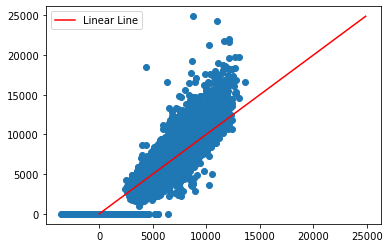

In [54]:
#Let's try the linear regression with validation to see what error value we are going to get.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_validation_pred = model.predict(X_validation)
print("MSE:", mean_squared_error(y_validation_pred, y_validation))

#Let's find our MAE value:
absolute_errors = []
for i in range(len(y_validation_pred)):
    absolute_errors.append(abs(y_validation_pred[i]-y_validation.iloc[i]))
absolute_errors.sort()
print("MAE:", sum(absolute_errors)/len(y_validation_pred))

#Let's plot a scatter plot to see the prediction accuracy
plt.scatter(y_validation_pred, y_validation)
plt.plot(np.arange(max(y_validation)), c = "r")
plt.legend(['Linear Line'], loc='best')
plt.show()




## Let's try to use ANN for better results. 

In [55]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(35107, 181) (15047, 181) (35107,) (15047,)


In [59]:
#Our ANN model with 32 input neurons, a hidden layer with 32 neurons and an output layer with 1:

model = Sequential([Dense(32, activation='relu'), Dense(32, activation='relu'), Dense(1, activation='relu')],)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
hist = model.fit(X_train, y_train,  batch_size=64, epochs=100, validation_data=(X_validation, y_validation))
model.evaluate(X_validation, y_validation)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

549/549 [==============================] - 1s 1ms/step - loss: 31914936.0000 - mae: 4734.4585 - val_loss: 32777952.0000 - val_mae: 4792.3125
Epoch 2/100
549/549 [==============================] - 0s 895us/step - loss: 30879106.0000 - mae: 4653.8311 - val_loss: 30365464.0000 - val_mae: 4630.9648
Epoch 3/100
549/549 [==============================] - 0s 823us/step - loss: 22331094.0000 - mae: 3899.2903 - val_loss: 13872471.0000 - val_mae: 3000.8308
Epoch 4/100
549/549 [========================

549/549 [==============================] - 0s 829us/step - loss: 1442536.2500 - mae: 808.8831 - val_loss: 1460026.7500 - val_mae: 788.7975
Epoch 51/100
549/549 [==============================] - 0s 883us/step - loss: 1436724.1250 - mae: 806.8647 - val_loss: 1523566.7500 - val_mae: 835.2213
Epoch 52/100
549/549 [==============================] - 0s 834us/step - loss: 1388195.3750 - mae: 793.6251 - val_loss: 1532734.2500 - val_mae: 835.1030
Epoch 53/100
549/549 [==============================] - 0s 875us/step - loss: 1436354.3750 - mae: 807.1276 - val_loss: 1569216.1250 - val_mae: 848.1094
Epoch 54/100
549/549 [==============================] - 0s 861us/step - loss: 1468207.5000 - mae: 811.6107 - val_loss: 1619108.8750 - val_mae: 868.2115
Epoch 55/100
549/549 [==============================] - 0s 897us/step - loss: 1419359.7500 - mae: 801.4886 - val_loss: 1437549.0000 - val_mae: 797.7785
Epoch 56/100
549/549 [==============================] - 0s 889us/step - loss: 1468050.5000 - mae: 815

[1414861.375, 783.9945068359375]

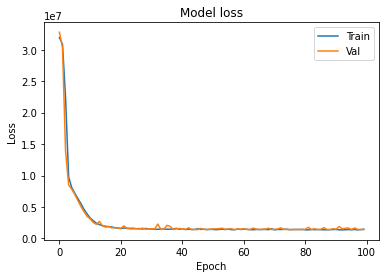

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

783.994276115203


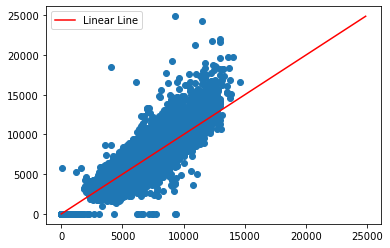

In [61]:
#Scatter plot for our fitted model's predicted sales values on our validation set vs our real sales values on validation set.

y_pred = model.predict(X_validation)
y_pred = pd.Series(y_pred[:,0], name = "Sales")
plt.scatter(y_pred, y_validation)
plt.plot(np.arange(max(y_validation)), c = "r")
absolute_errors = []
for i in range(len(y_pred)):
    absolute_errors.append(abs(y_pred.iloc[i]-y_validation.iloc[i]))
absolute_errors.sort()
print(sum(absolute_errors)/len(y_pred))
plt.legend(['Linear Line'], loc='best')
plt.show()

In [62]:
#If we manually set the sales values of our predictions which have the Open column as 0 to 
# equal to 0, we can reduce our error a little more.

def manual_set_to_0():
    for i in range(len(y_pred)):
        if X_validation.iloc[i, 1] == 0:
            y_pred.iloc[i] = 0

#manuel_set_to_0()

#As this might be considered cheating, we are not going to do this.

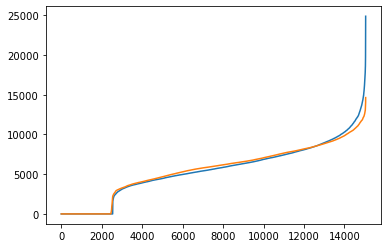

In [63]:
#Sorted values comparison
plt.plot(np.arange(len(y_validation)), y_validation.sort_values())
plt.plot(np.arange(len(y_pred)), y_pred.sort_values())


783.994276115203


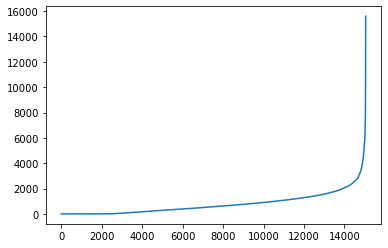

In [64]:
#Plot to see our absolute error values
absolute_errors = []
for i in range(len(y_pred)):
    absolute_errors.append(abs(y_pred.iloc[i]-y_validation.iloc[i]))
absolute_errors.sort()
print(sum(absolute_errors)/len(y_pred))
plt.plot(np.arange(len(absolute_errors)), absolute_errors)

## Let's Try to use Ridge Regression

In [65]:
from sklearn.linear_model import Ridge

In [66]:
alphas = np.linspace(5,-2,100)
alpha_values = []
score = []
for i in alphas:
    ridge_model = Ridge(alpha = i)
    ridge_model.fit(X_train, y_train)      
    y_pred = ridge_model.predict(X_validation) 
    alpha_values.append(i)
    score.append(mean_squared_error(y_validation, y_pred))
alpha_values.sort()
score.sort()
rand_dict = {"Alpha values": alpha_values, "MSE": score}
ridge_scores = pd.DataFrame(rand_dict)

In [67]:
ridge_scores

,Alpha values,MSE
0,-2.000000,1.835129e+06
1,-1.929293,1.835157e+06
2,-1.858586,1.835185e+06
3,-1.787879,1.835213e+06
4,-1.717172,1.835241e+06
5,-1.646465,1.835269e+06
6,-1.575758,1.835297e+06
7,-1.505051,1.835326e+06
8,-1.434343,1.835354e+06
9,-1.363636,1.835383e+06


## As we can see, regularization is not helping that much. 
## And our ANN model is so much more accurate than our regression models.

## Now we are going to convert the requested test_set data to the same way we converted our test_set:

In [68]:
test_set = pd.read_excel("Test Set.xlsx")
test_set.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [69]:
dummies = pd.get_dummies(test_set[["StateHoliday", "SchoolHoliday"]], dummy_na = True)
test_set = pd.concat([test_set, dummies[['StateHoliday_a', "StateHoliday_0", "StateHoliday_nan"]]], axis = 1)
test_set.drop("StateHoliday", axis = 1, inplace = True)

test_set.head()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_0,StateHoliday_nan
0,1,1,4,2015-09-17,1,1,0,0,1,0
1,2,3,4,2015-09-17,1,1,0,0,1,0
2,3,7,4,2015-09-17,1,1,0,0,1,0
3,4,8,4,2015-09-17,1,1,0,0,1,0
4,5,9,4,2015-09-17,1,1,0,0,1,0


In [70]:
df_test = pd.merge(test_set, store_df, how = 'inner', on = 'Store')

In [71]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_0,StateHoliday_nan,...,Promo2SinceWeek,Promo2SinceYear,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",StoreType_a,StoreType_b,StoreType_c,Assortment_a,Assortment_b
0,1,1,4,2015-09-17,1,1,0,0,1,0,...,NaN,NaN,0,0,0,0,0,1,1,0
1,857,1,3,2015-09-16,1,1,0,0,1,0,...,NaN,NaN,0,0,0,0,0,1,1,0
2,1713,1,2,2015-09-15,1,1,0,0,1,0,...,NaN,NaN,0,0,0,0,0,1,1,0
3,2569,1,1,2015-09-14,1,1,0,0,1,0,...,NaN,NaN,0,0,0,0,0,1,1,0
4,3425,1,7,2015-09-13,0,0,0,0,1,0,...,NaN,NaN,0,0,0,0,0,1,1,0


In [72]:
import datetime
df_day_list = []
for day in range(len(df_test)):
    df_day_list.append(int(df_test["Date"].loc[day].strftime("%d")))

df_month_list = []    
for month in range(len(df_test)):
    df_month_list.append(int(df_test["Date"].loc[month].strftime("%m")))

df_year_list = [] 
for year in range(len(df_test)):
    df_year_list.append(int(df_test["Date"].loc[year].strftime("%y")))

df_test["Day"] = df_day_list
df_test["Month"] = df_month_list
df_test["Year"] = df_year_list

df_test.drop("Date", axis = 1, inplace = True)

In [73]:
df_test.head()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_0,StateHoliday_nan,Competition,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",StoreType_a,StoreType_b,StoreType_c,Assortment_a,Assortment_b,Day,Month,Year
0,1,1,4,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,17,9,15
1,857,1,3,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,16,9,15
2,1713,1,2,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,15,9,15
3,2569,1,1,1,1,0,0,1,0,1,...,0,0,0,0,1,1,0,14,9,15
4,3425,1,7,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,13,9,15


In [74]:
df_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday',
       'StateHoliday_a', 'StateHoliday_0', 'StateHoliday_nan', 'Competition',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'Assortment_a',
       'Assortment_b', 'Day', 'Month', 'Year'],
      dtype='object')

In [75]:
#Putting extra dummies we did after realizing we might need them:

#Promo2SinceWeek
dummies = pd.get_dummies(df_test["Promo2SinceWeek"], prefix='Promo2SinceWeek', dummy_na = True)
df_deneme = pd.concat([df_test, dummies], axis = 1)
df_deneme.drop("Promo2SinceWeek", axis = 1, inplace = True)
print(df_deneme)

#Promo2SinceYear
dummies = pd.get_dummies(df_test["Promo2SinceYear"], prefix='Promo2SinceYear', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Promo2SinceYear", axis = 1, inplace = True)


#CompetitionOpenSinceMonth
dummies = pd.get_dummies(df_test["CompetitionOpenSinceMonth"], prefix='CompetitionOpenSinceMonth', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("CompetitionOpenSinceMonth", axis = 1, inplace = True)


#CompetitionOpenSinceYear
dummies = pd.get_dummies(df_test["CompetitionOpenSinceYear"], prefix='CompetitionOpenSinceYear', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("CompetitionOpenSinceYear", axis = 1, inplace = True)


#DayOfWeek
dummies = pd.get_dummies(df_test["DayOfWeek"], prefix='DayOfWeek', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("DayOfWeek", axis = 1, inplace = True)


#Date:
dummies = pd.get_dummies(df_test["Day"], prefix='Day', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Day", axis = 1, inplace = True)

dummies = pd.get_dummies(df_test["Month"], prefix='Month', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Month", axis = 1, inplace = True)

dummies = pd.get_dummies(df_test["Year"], prefix='Year', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Year", axis = 1, inplace = True)


#Store
dummies = pd.get_dummies(df_test["Store"], prefix='Store', dummy_na = True)
df_deneme = pd.concat([df_deneme, dummies], axis = 1)
df_deneme.drop("Store", axis = 1, inplace = True)


         Id  Store  DayOfWeek  Open  Promo  SchoolHoliday  StateHoliday_a  \
0         1      1          4     1      1              0               0   
1       857      1          3     1      1              0               0   
2      1713      1          2     1      1              0               0   
3      2569      1          1     1      1              0               0   
4      3425      1          7     0      0              0               0   
...     ...    ...        ...   ...    ...            ...             ...   
2011  36850     53          3     1      1              1               0   
2012  37706     53          2     1      1              1               0   
2013  38562     53          1     1      1              1               0   
2014  39418     53          7     0      0              0               0   
2015  40274     53          6     1      0              0               0   

      StateHoliday_0  StateHoliday_nan  Competition  ...  \
0              

In [76]:
print(df_deneme.columns)

Index(['Id', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday_a',
       'StateHoliday_0', 'StateHoliday_nan', 'Competition',
       'CompetitionDistance', 'Promo2',
       ...
       'Store_45.0', 'Store_46.0', 'Store_47.0', 'Store_48.0', 'Store_49.0',
       'Store_50.0', 'Store_51.0', 'Store_52.0', 'Store_53.0', 'Store_nan'],
      dtype='object', length=153)


In [77]:
print(X_backup.columns)

Index(['Open', 'Promo', 'SchoolHoliday', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Competition', 'CompetitionDistance', 'Promo2',
       'PromoInterval_Jan,Apr,Jul,Oct',
       ...
       'Store_47.0', 'Store_48.0', 'Store_49.0', 'Store_50.0', 'Store_51.0',
       'Store_52.0', 'Store_53.0', 'Store_54.0', 'Store_55.0', 'Store_nan'],
      dtype='object', length=181)


In [78]:
#To see which columns are we missing and add them with values of 0:
myList = list(set(X_backup.columns) - set(df_deneme.columns))
myList

['Promo2SinceYear_2015.0',
 'Month_3.0',
 'Store_2.0',
 'Promo2SinceWeek_26.0',
 'Store_44.0',
 'Store_18.0',
 'Year_14.0',
 'Store_54.0',
 'Store_55.0',
 'Month_2.0',
 'CompetitionOpenSinceYear_2004.0',
 'Store_34.0',
 'Month_6.0',
 'Store_5.0',
 'Store_26.0',
 'CompetitionOpenSinceYear_2015.0',
 'Store_28.0',
 'Month_10.0',
 'Month_4.0',
 'Month_7.0',
 'Month_1.0',
 'Store_6.0',
 'Month_5.0',
 'Month_12.0',
 'Store_37.0',
 'Promo2SinceWeek_6.0',
 'Store_4.0',
 'Year_13.0',
 'StateHoliday_b',
 'Store_17.0',
 'Month_11.0',
 'StateHoliday_c']

In [79]:
df_deneme.set_index("Id", inplace = True)

In [80]:
#Dropping the columns not available on train set:
myList2 = set(df_deneme.columns) - set(X_backup.columns)

df_deneme.drop(myList2, axis = 1, inplace = True)

In [81]:
#To create and add 0 values to missing columns:
for i in myList:
    df_deneme[i] = np.zeros(len(df_deneme['Open']))

In [82]:
df_deneme

,Open,Promo,SchoolHoliday,StateHoliday_a,Competition,CompetitionDistance,Promo2,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov",StoreType_a,...,Month_5.0,Month_12.0,Store_37.0,Promo2SinceWeek_6.0,Store_4.0,Year_13.0,StateHoliday_b,Store_17.0,Month_11.0,StateHoliday_c
Id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,1270.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,1,1,0,0,1,1270.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,1,1,0,0,1,1270.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2569,1,1,0,0,1,1270.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3425,0,0,0,0,1,1270.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36850,1,1,1,0,1,30360.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37706,1,1,1,0,1,30360.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38562,1,1,1,0,1,30360.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
df_deneme.sort_values(by = 'Id')

,Open,Promo,SchoolHoliday,StateHoliday_a,Competition,CompetitionDistance,Promo2,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov",StoreType_a,...,Month_5.0,Month_12.0,Store_37.0,Promo2SinceWeek_6.0,Store_4.0,Year_13.0,StateHoliday_b,Store_17.0,Month_11.0,StateHoliday_c
Id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,1270.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,0,1,14130.0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,0,1,24000.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,1,7520.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1,0,0,1,2030.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40270,1,0,0,0,1,18010.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40271,1,0,0,0,1,6260.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40272,1,0,0,0,1,10570.0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#To check for missing columns
print(set(X_backup.columns) - set(df_deneme.columns))
print(set(df_deneme.columns) - set(X_backup.columns))

set()
set()


In [85]:
#Our columns are matched. Now we can predict:
X_test = df_deneme.sort_values(by = 'Id')
X_test_backup = X_test
min_max_scaler = preprocessing.MinMaxScaler()
X_test = min_max_scaler.fit_transform(X_test)

y_test_predicted = model.predict(X_test)
#This is going to be our result, which we will use to submit.

y_test_predicted

array([[3929.4585],
       [   0.    ],
       [   0.    ],
       ...,
       [   0.    ],
       [   0.    ],
       [   0.    ]], dtype=float32)

In [86]:
sample_sub = pd.read_excel("Sample Submission.xlsx")

print(sample_sub.count())
print(len(y_test_predicted))


Id       2016
Sales    2016
dtype: int64
2016


In [87]:
idx = X_test_backup.index
idx

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            40265, 40266, 40267, 40268, 40269, 40270, 40271, 40272, 40273,
            40274],
           dtype='int64', name='Id', length=2016)

In [88]:
y_test_predicted_series = pd.Series(y_test_predicted[:,0], name = 'Sales')
y_test_predicted_series
y_test_predicted_dict = { 'Id' : idx, 'Sales' : y_test_predicted_series}
y_test_predicted_df = pd.DataFrame(y_test_predicted_dict)

#This is going to be our submission data.
y_test_predicted_df

,Id,Sales
0,1,3929.458496
1,2,0.000000
2,3,0.000000
3,4,5.266786
4,5,1905.251953
...,...,...
2011,40270,0.000000
2012,40271,0.000000
2013,40272,0.000000
2014,40273,0.000000


In [89]:
y_test_predicted_df['Sales'].mean()

1489.8045654296875

In [90]:
y.mean()

5453.706523906369

In [91]:
#As seen above, our model probably did not make a very goodjob on predicting the test values since that mean is so much less
#than the mean of the test values. But still, this was the best we could do.

In [92]:
#Exporting our data. You might skip this part too.

y_test_predicted_df.to_excel(r'Homework_Sales_Forecast_Group1.xlsx', index = False, header=False)